# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

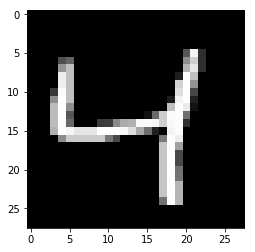

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6949
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6884
Epoch: 1/20... Training loss: 0.6847
Epoch: 1/20... Training loss: 0.6805
Epoch: 1/20... Training loss: 0.6759
Epoch: 1/20... Training loss: 0.6702
Epoch: 1/20... Training loss: 0.6630
Epoch: 1/20... Training loss: 0.6546
Epoch: 1/20... Training loss: 0.6460
Epoch: 1/20... Training loss: 0.6349
Epoch: 1/20... Training loss: 0.6249
Epoch: 1/20... Training loss: 0.6078
Epoch: 1/20... Training loss: 0.5991
Epoch: 1/20... Training loss: 0.5822
Epoch: 1/20... Training loss: 0.5666
Epoch: 1/20... Training loss: 0.5498
Epoch: 1/20... Training loss: 0.5267
Epoch: 1/20... Training loss: 0.5110
Epoch: 1/20... Training loss: 0.4964
Epoch: 1/20... Training loss: 0.4775
Epoch: 1/20... Training loss: 0.4569
Epoch: 1/20... Training loss: 0.4409
Epoch: 1/20... Training loss: 0.4320
Epoch: 1/20... Training loss: 0.4084
Epoch: 1/20... Training loss: 0.3969
Epoch: 1/20... Training loss: 0.3863
E

Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.2057
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1894
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1900
E

Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1647
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1647
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1654
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1557
E

Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1395
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1401
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1380
E

Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1207
E

Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1190
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1194
E

Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1075
E

Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1119
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1004
E

Epoch: 7/20... Training loss: 0.1070
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1005
E

Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.0939
Epoch: 7/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.1044
Epoch: 8/20... Training loss: 0.1033
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1022
E

Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1001
E

Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0934
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0979
E

Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0999
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.1011
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.1014
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0982
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0990
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0907
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0911
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0988
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0872
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0997
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0865
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0877
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0893
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

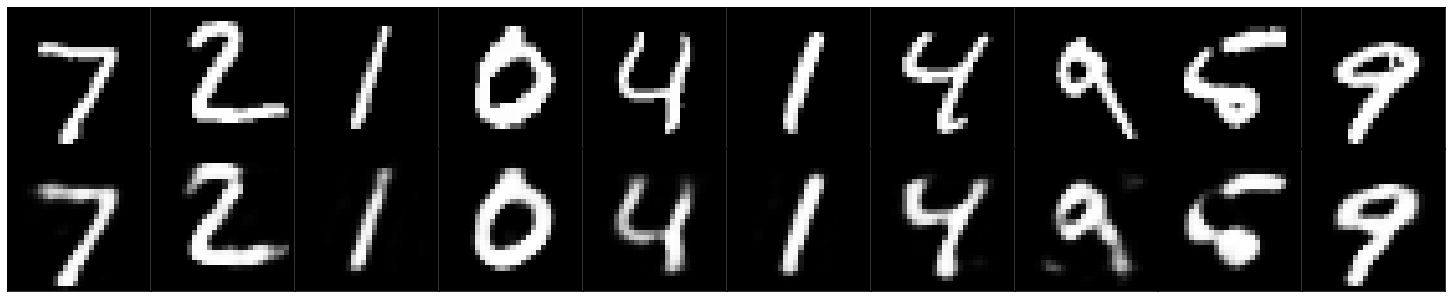

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.